In [9]:
from tqdm.notebook import tqdm
import pandas as pd
import os

In [10]:
structures = pd.read_csv("datasets/dichalcogenides_innopolis_202105/defects.csv", index_col=0)

In [11]:
import pymatgen.io.cif
STRUCTURES_FOLDER = "datasets/dichalcogenides_innopolis_202105/initial/"
initial_structures = dict()
for structure_file in tqdm(os.listdir(STRUCTURES_FOLDER)):
  this_file = pymatgen.io.cif.CifParser(os.path.join(STRUCTURES_FOLDER, structure_file))
  initial_structures[os.path.splitext(structure_file)[0]] = this_file.get_structures()[0]

  0%|          | 0/3480 [00:00<?, ?it/s]

/temporary/pymatgen/pymatgen/io/cif.py:1123: UserWarning:

Issues encountered while parsing CIF: Some fractional co-ordinates rounded to ideal values to avoid issues with finite precision.



In [12]:
structures["initial_structure"] = structures.apply(lambda row: initial_structures[row._id], axis=1)

In [21]:
n_atoms = structures.initial_structure.apply(len)
structures["energy_per_atom_from_total"] = structures["energy"]/n_atoms

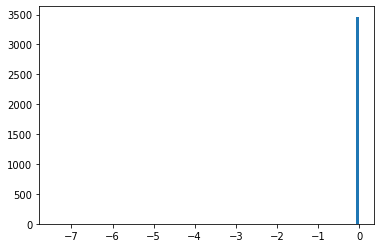

In [22]:
import matplotlib.pyplot as plt
plt.hist(structures["energy_per_atom_from_total"] - structures["energy_per_atom"], bins=100);

For a small number of structures, energy/n_atoms != energy_per_atom

In [23]:
defective = structures[(structures["energy_per_atom_from_total"] - structures["energy_per_atom"]) < -5]

In [24]:
defective.head()

,_id,descriptor_id,defect_id,energy,energy_per_atom,fermi_level,homo,lumo,initial_structure,energy_per_atom_from_total
14,60924652f9eca94c44df92c2,6092462bf9eca94c44df9287,1,-340.771942,-7.408086,0.637950,0.120984,1.211954,"[[ 3.19073038 -1.84216903 5.12364434] S, [4.7...",-14.816171
1168,609246caf9eca94c44df9744,6092462bf9eca94c44df928e,1,-308.955679,-6.716428,0.337715,-0.028102,0.730098,"[[ 3.32694941 -3.84163032 3.86285575] Mo, [ 1...",-13.432856
1387,609246edf9eca94c44df981f,6092462bf9eca94c44df929e,1,-345.733711,-7.202786,1.190634,0.218535,2.366327,"[[1.59536523 0.92108447 5.12364434] O, [ 3.190...",-14.405571
1412,609246f6f9eca94c44df9838,6092462bf9eca94c44df928a,2,-713.701059,-6.608343,0.680652,-0.014352,1.358684,"[[-14.97127252 -6.72285312 -11.58856725] Mo, ...",-13.216686
1447,60924700f9eca94c44df985b,6092462bf9eca94c44df92a8,2,-782.679589,-7.383770,0.776625,0.142937,1.433823,"[[-14.35828649 -4.60542257 -9.07875766] S, [...",-14.767539
